# Creating the graph

Within graph-based weather models one single graph is used to represent the encode-process-decode operations of the data-driven weather model. The graph is a directed acyclic graph (DAG) with the nodes representing features at a given location in space and the edges representing flow of information.

`weather-model-graphs` provides a framework for creating and visualising graphs for data-driven weather models. The framework is designed to be flexible and allow for the creation of a wide range of graph architectures.

The graph is comprised of three components that represent the three encode-process-decode operations:

- `g2m`: The encoding from the physical *grid* space onto the computational *mesh* space.
- `m2m`: The processing of the data in the computational *mesh* space.
- `m2g`: The decoding from the computational *mesh* space onto the physical *grid* space.

The graph is a directed acyclic graph (DAG) with the nodes representing points in space and the edges 

# The grid nodes

To get started we will create a set of fake grid nodes, which represent the geographical locations (x/y cartesian) where we have values for the physical fields.

2024-11-21 10:10:23.295 | DEBUG    | weather_model_graphs.create.base:create_all_graph_components:90 - No `projection` given: Assuming `coords` contains in-projection Cartesian coordinates.


<Axes: >

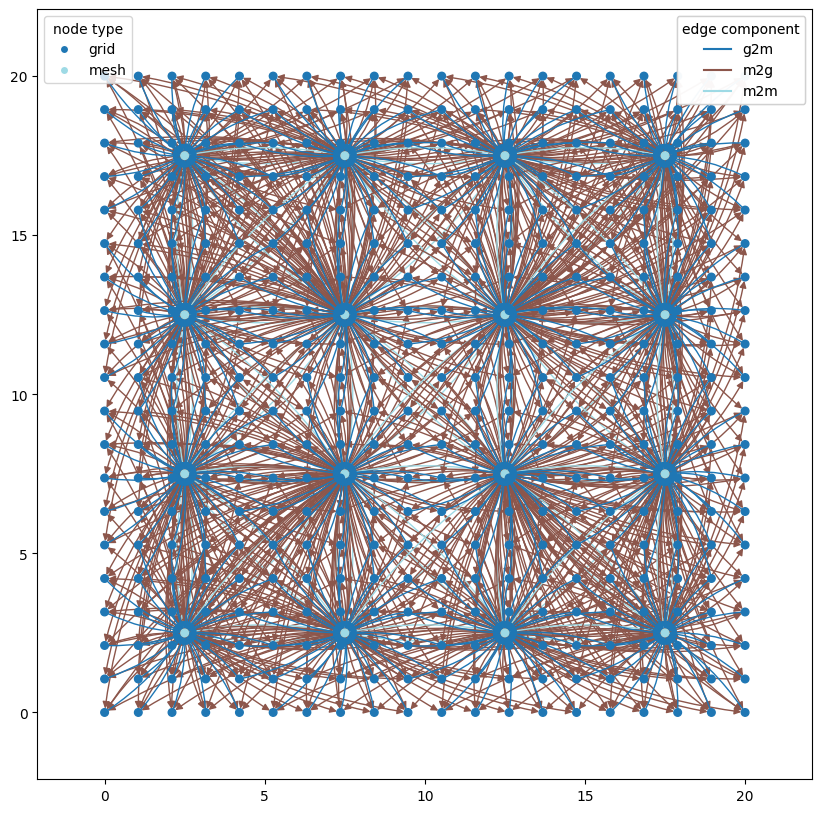

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import weather_model_graphs as wmg


def _create_fake_xy(N=10):
    x = np.linspace(0.0, N, N)
    y = np.linspace(0.0, N, N)
    xy_mesh = np.meshgrid(x, y)
    xy = np.stack([mg_coord.flatten() for mg_coord in xy_mesh], axis=1)  # Shaped (N, 2)
    return xy


xy = _create_fake_xy(20)
graph = wmg.create.archetype.create_keisler_graph(coords=xy, mesh_node_distance=5.0)
wmg.visualise.nx_draw_with_pos_and_attr(
    graph, node_size=30, edge_color_attr="component", node_color_attr="type"
)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import weather_model_graphs as wmg

In [2]:
def _create_fake_xy(N=10):
    x = np.linspace(0.0, N, N)
    y = np.linspace(0.0, N, N)
    xy_mesh = np.meshgrid(x, y)
    xy = np.stack([mg_coord.flatten() for mg_coord in xy_mesh], axis=1)  # Shaped (N, 2)
    return xy

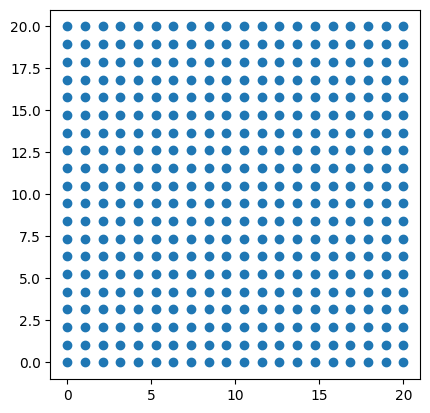

In [6]:
xy = _create_fake_xy(20)

fig, ax = plt.subplots()
ax.scatter(xy[:, 0], xy[:, 1])
ax.set_aspect(1)

# The mesh nodes and graph

Lets start with a simple mesh which only has nearest neighbour connections. At the moment `weather-model-graphs` creates a square mesh that sits within the spatial domain spanned by the grid nodes. Techniques for adding non-square meshes are in development.

<Axes: >

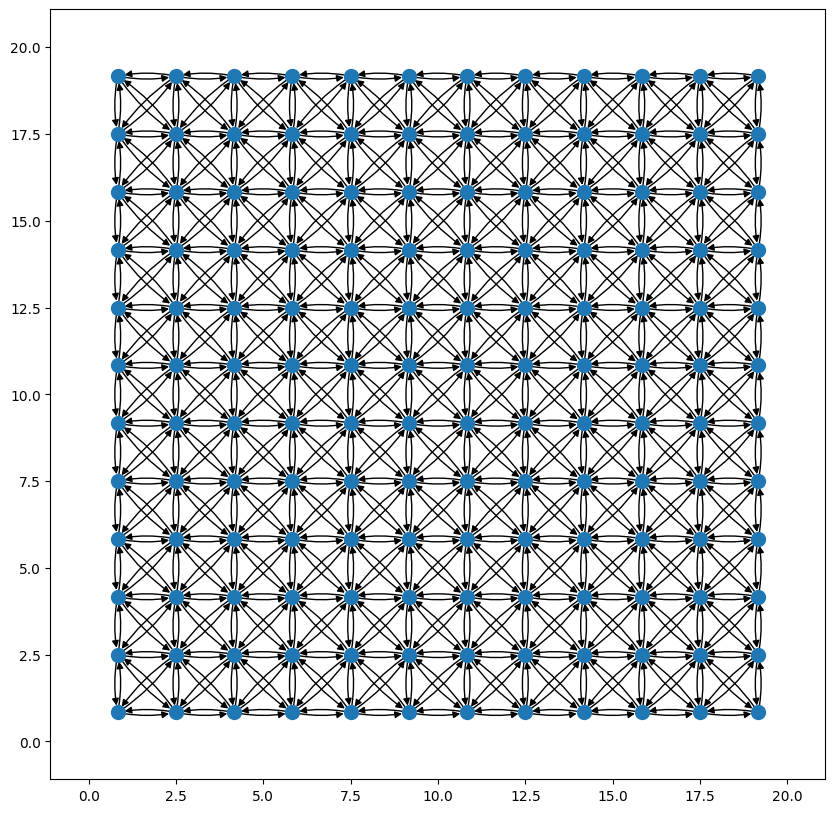

In [7]:
g_m2m = wmg.create.mesh.create_single_level_2d_mesh_graph(xy=xy, nx=12, ny=12)

wmg.visualise.nx_draw_with_pos_and_attr(g_m2m)

# Graph archetypes

To simplify the creation of the full *encode-process-decode* graph, the `weather-model-graphs` package contains implementations of a number of graph archetypes.
These architypes principally differ in the way the mesh component of the graph is constructed, but also in the way the grid and mesh components are connected. As more approaches are developed they will be added to the library.


## The Keisler 2022 single-range mesh

The first archetype is the single-range mesh from [Keisler 2022](https://arxiv.org/abs/2202.07575) which demonstrated that graph-based neural-netwoks can be used to predict the weather with similar accuracy to traditional numerical weather models. The mesh is a simple nearest-neighbour mesh with a single range of connections.

In [8]:
?wmg.create.archetype.create_keisler_graph

Signature:
wmg.create.archetype.create_keisler_graph(
    coords,
    mesh_node_distance=3,
    projection=None,
)
Docstring:
Create a flat LAM graph from Oskarsson et al (2023, https://arxiv.org/abs/2309.17370)
This graph setup is inspired by the global graph used by Keisler (2022, https://arxiv.org/abs/2202.07575).

This graph is a flat single scale graph with nearest neighbour connectivity
(8 neighbours) within the mesh.

The grid to mesh connectivity connects each mesh node to grid nodes withing
distance 0.51d, where d is the length of diagonal edges between neighbouring
mesh nodes. The choice of 0.51 makes sure that all grid node positions will
be connected to at least one mesh node (see
https://www.desmos.com/calculator/sqqz0ka4ho for a visualization).
The mesh to grid connectivity connects each grid point to the 4 nearest mesh nodes.

Parameters
----------
coords: np.ndarray
    2D array of grid point positions, either in-projection Cartesian coordinates or lat-lons
mesh_node_di

In [9]:
graph = wmg.create.archetype.create_keisler_graph(coords=xy, mesh_node_distance=5.0)
graph

2024-11-21 10:09:14.900 | DEBUG    | weather_model_graphs.create.base:create_all_graph_components:90 - No `projection` given: Assuming `coords` contains in-projection Cartesian coordinates.


<Axes: >

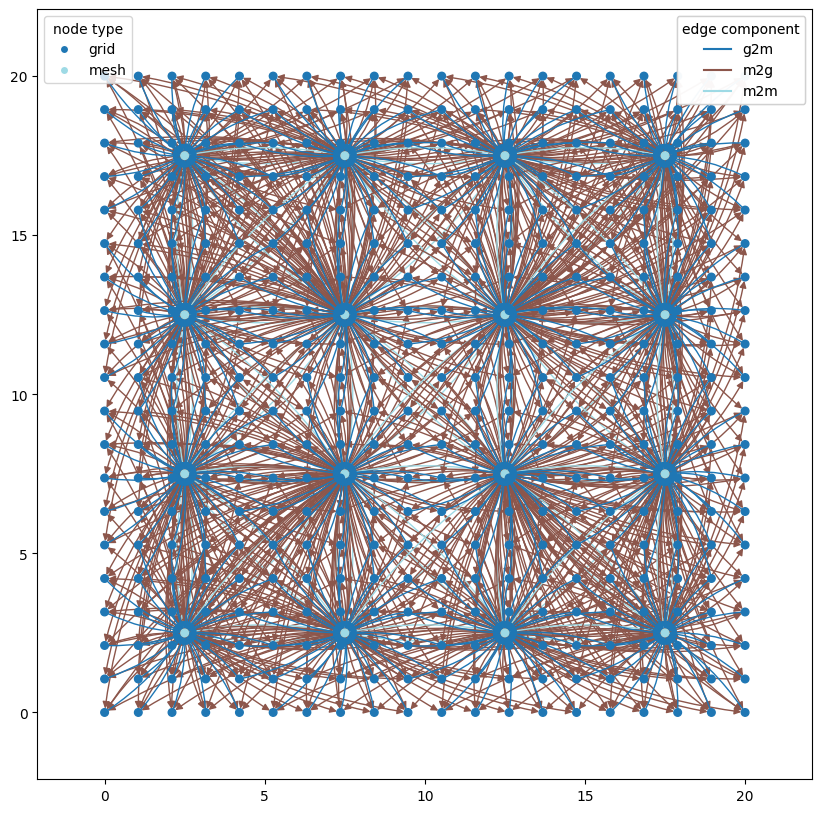

In [10]:
wmg.visualise.nx_draw_with_pos_and_attr(
    graph, node_size=30, edge_color_attr="component", node_color_attr="type"
)

In [ ]:
graph_components = wmg.split_graph_by_edge_attribute(graph=graph, attr="component")
graph_components

In [ ]:
n_components = len(graph_components)
fig, axes = plt.subplots(nrows=n_components, ncols=1, figsize=(10, 9 * n_components))

for (name, g), ax in zip(graph_components.items(), axes.flatten()):
    pl_kwargs = {}
    if name == "m2m":
        pl_kwargs = dict(edge_color_attr="len")
    elif name == "g2m" or name == "m2g":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="type")

    wmg.visualise.nx_draw_with_pos_and_attr(graph=g, ax=ax, node_size=30, **pl_kwargs)
    ax.set_title(name)

## GraphCast (Lam et al 2022) graph

The second archetype is the GraphCast graph from [Lam et al 2022](https://arxiv.org/abs/2202.07575) which built on the Keisler 2022 graph by adding longer-range connections in the mesh component of the graph. This allows the model to capture both short and long-range spatial interactions.

In [ ]:
?wmg.create.archetype.create_graphcast_graph

In [ ]:
graph = wmg.create.archetype.create_graphcast_graph(coords=xy)

In [ ]:
wmg.visualise.nx_draw_with_pos_and_attr(
    graph, node_size=30, edge_color_attr="component", node_color_attr="type"
)

In [ ]:
graph_components = wmg.split_graph_by_edge_attribute(graph=graph, attr="component")
graph_components

In [ ]:
n_components = len(graph_components)
fig, axes = plt.subplots(nrows=n_components, ncols=1, figsize=(10, 9 * n_components))

for (name, g), ax in zip(graph_components.items(), axes.flatten()):
    pl_kwargs = {}
    if name == "m2m":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="level", node_size=10)
    elif name == "g2m" or name == "m2g":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="type", node_size=30)

    wmg.visualise.nx_draw_with_pos_and_attr(graph=g, ax=ax, **pl_kwargs)
    ax.set_title(name)
    ax.set_aspect(1.0)

## Oskarsson et al 2023 hierarchical graph

The hierarchical graph from [Oskarsson et al 2023](https://arxiv.org/abs/2202.07575) builds on the GraphCast graph by adding a hierarchical structure to the mesh component of the graph. This allows the model to capture both short and long-range spatial interactions and to learn the spatial hierarchy of the data. The message-passing on different levels of interaction length-scales are learnt separately (rather than in a single pass) which allows the model to learn the spatial hierarchy of the data.

In [ ]:
?wmg.create.archetype.create_oskarsson_hierarchical_graph

In [ ]:
graph = wmg.create.archetype.create_oskarsson_hierarchical_graph(coords=xy)
graph

In [ ]:
wmg.visualise.nx_draw_with_pos_and_attr(
    graph, node_size=30, edge_color_attr="component", node_color_attr="type"
)

The hierarchical graph is a bit more complex, so we will not only split by the `g2m`, `m2m` and `m2g` components, but also further split the `m2m` component into the different directions that the edges form in the hierarchical mesh graph.
Specifically, the `m2m` graph component will be split into three: 1) `m2m_up`, 2) `m2m_same` and 3) `m2m_down`, using the utility function
`wmg.split_graph_by_edge_attribute(...)` to use the `direction` attribute that each of the nodes in the `m2m` graph components has. This makes it possible to visualise each of these parts of the graph separately:

In [ ]:
graph_components = wmg.split_graph_by_edge_attribute(graph=graph, attr="component")
m2m_graph = graph_components.pop("m2m")
# we'll create an identifier for each m2m component so that we know that what part of the
# m2m subgraph we're looking at
m2m_graph_components = {
    f"m2m_{direction}": graph
    for direction, graph in wmg.split_graph_by_edge_attribute(
        graph=m2m_graph, attr="direction"
    ).items()
}
graph_components.update(m2m_graph_components)
graph_components

In [ ]:
n_components = len(graph_components)
fig, axes = plt.subplots(nrows=n_components, ncols=1, figsize=(10, 9 * n_components))

for (name, graph), ax in zip(graph_components.items(), axes.flatten()):
    pl_kwargs = {}
    if name == "m2m_same":
        pl_kwargs = dict(edge_color_attr="level", node_color_attr="level", node_size=10)
    elif name == "g2m" or name == "m2g":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="type", node_size=30)
    elif name in ["m2m_up", "m2m_down"]:
        pl_kwargs = dict(
            edge_color_attr="levels", node_color_attr="level", node_size=30
        )

    wmg.visualise.nx_draw_with_pos_and_attr(graph, ax=ax, **pl_kwargs)
    ax.set_title(name)
    ax.set_aspect(1.0)

Finally, we can repeat this with the `m2m_same` graph and split by level, so that we can see the connections in each hiearchical level of the graph separately:

In [ ]:
m2m_same_graph = graph_components["m2m_same"]
# we'll create an identifier for each m2m component so that we know that what part of the
# m2m subgraph we're looking at
m2m_same_graph_components = {
    f"m2m_same_level_{level}": graph
    for level, graph in wmg.split_graph_by_edge_attribute(
        graph=m2m_same_graph, attr="level"
    ).items()
}
m2m_same_graph_components

In [ ]:
n_components = len(m2m_same_graph_components)
fig, axes = plt.subplots(nrows=n_components, ncols=1, figsize=(10, 9 * n_components))

for (name, graph), ax in zip(m2m_same_graph_components.items(), axes.flatten()):
    wmg.visualise.nx_draw_with_pos_and_attr(graph, ax=ax)
    ax.set_title(name)
    ax.set_aspect(1.0)

# Creating your own graph architecture

Instead of creating one of the archetype above, you can also create your own
graph architecture.
This can be done by calling the `create_all_graph_components` function and
defining the `g2m`, `m2m` and `m2g` connectivity method (any arguments for
each).

Here we will only make nearest-neighbour connections in both directions between
the mesh and grid nodes. As you will see below that leads to a graph that ignores
most of the input from the grid nodes, so this is not a good graph architecture.

In [ ]:
graph = wmg.create.create_all_graph_components(
    m2m_connectivity="flat_multiscale",
    coords=xy,
    m2m_connectivity_kwargs=dict(
        mesh_node_distance=2, level_refinement_factor=3, max_num_levels=None
    ),
    g2m_connectivity="nearest_neighbour",
    m2g_connectivity="nearest_neighbour",
)

graph_components = wmg.split_graph_by_edge_attribute(graph=graph, attr="component")

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 24))

for (name, graph), ax in zip(graph_components.items(), axes.flatten()):
    pl_kwargs = {}
    if name == "m2m":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="level", node_size=10)
    elif name == "g2m" or name == "m2g":
        pl_kwargs = dict(edge_color_attr="len", node_color_attr="type", node_size=30)

    wmg.visualise.nx_draw_with_pos_and_attr(graph, ax=ax, **pl_kwargs)
    ax.set_title(name)
    ax.set_aspect(1.0)